In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import base64
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/takishun/files20220327/access_log.txt',delimiter=' ',names=('ymd','time','from_ip_adress','to_ip_address','HTTP','response','TorF','basic64'))

In [3]:
data['ymd']=data['ymd'].str.replace('[','')
data['time']=data['time'].str.replace(']','')
data['time']=pd.to_datetime(data['ymd'] + ' ' + data['time'],format='%Y-%m-%d %H:%M:%S+0900')
data['ymd']=pd.to_datetime(data['ymd'],format='%Y-%m-%d')

In [4]:
data

,ymd,time,from_ip_adress,to_ip_address,HTTP,response,TorF,basic64
0,2022-03-20,2022-03-20 12:13:36,190.244.250.46,133.242.178.40:80,GET / HTTP/1.0,200,False,R0VUIC8gSFRUUC8xLjAKSG9zdDogMTMzLjI0Mi4xNzguND...
1,2022-03-20,2022-03-20 13:23:39,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
2,2022-03-20,2022-03-20 13:23:40,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
3,2022-03-20,2022-03-20 13:25:45,144.91.98.17,133.242.178.40:80,GET /phpMyAdmin_/index.php?lang=en HTTP/1.1,200,False,R0VUIC9waHBNeUFkbWluXy9pbmRleC5waHA/bGFuZz1lbi...
4,2022-03-20,2022-03-20 13:25:45,144.91.98.17,133.242.178.40:80,GET /mysql/db/index.php?lang=en HTTP/1.1,200,False,R0VUIC9teXNxbC9kYi9pbmRleC5waHA/bGFuZz1lbiBIVF...
...,...,...,...,...,...,...,...,...
1302,2022-03-27,2022-03-27 13:43:01,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
1303,2022-03-27,2022-03-27 13:43:01,95.182.120.39,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,UE9TVCAvYXV0b2Rpc2NvdmVyIEhUVFAvMS4xCkhvc3Q6ID...
1304,2022-03-27,2022-03-27 15:09:47,64.62.197.152,133.242.178.40:80,GET / HTTP/1.1,200,False,R0VUIC8gSFRUUC8xLjEKSG9zdDogMTMzLjI0Mi4xNzguND...
1305,2022-03-27,2022-03-27 15:55:58,45.33.99.138,133.242.178.40:80,POST /boaform/admin/formLogin HTTP/1.1,200,False,UE9TVCAvYm9hZm9ybS9hZG1pbi9mb3JtTG9naW4gSFRUUC...


In [5]:
for i in range(0,len(data['basic64'])):
    data['basic64'][i] = base64.b64decode(data['basic64'][i]).decode()

In [6]:
b64_decL = [base64.b64decode(data['basic64'][i]).decode().split('\n') for i in range(0,len(data['basic64']))] 

Error: Incorrect padding

In [ ]:
data['res']=data['HTTP']
data['url']=data['HTTP']
for i in range(0,len(data['HTTP'])):
    data['res'][i] = data['HTTP'].str.split()[i][0]
    data['url'][i] = data['HTTP'].str.split()[i][2]

In [7]:
data

,ymd,time,from_ip_adress,to_ip_address,HTTP,response,TorF,basic64
0,2022-03-20,2022-03-20 12:13:36,190.244.250.46,133.242.178.40:80,GET / HTTP/1.0,200,False,GET / HTTP/1.0\nHost: 133.242.178.40\nAccept: ...
1,2022-03-20,2022-03-20 13:23:39,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...
2,2022-03-20,2022-03-20 13:23:40,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...
3,2022-03-20,2022-03-20 13:25:45,144.91.98.17,133.242.178.40:80,GET /phpMyAdmin_/index.php?lang=en HTTP/1.1,200,False,GET /phpMyAdmin_/index.php?lang=en HTTP/1.1\nH...
4,2022-03-20,2022-03-20 13:25:45,144.91.98.17,133.242.178.40:80,GET /mysql/db/index.php?lang=en HTTP/1.1,200,False,GET /mysql/db/index.php?lang=en HTTP/1.1\nHost...
...,...,...,...,...,...,...,...,...
1302,2022-03-27,2022-03-27 13:43:01,176.96.228.4,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...
1303,2022-03-27,2022-03-27 13:43:01,95.182.120.39,133.242.178.40:80,POST /autodiscover HTTP/1.1,200,False,POST /autodiscover HTTP/1.1\nHost: 133.242.178...
1304,2022-03-27,2022-03-27 15:09:47,64.62.197.152,133.242.178.40:80,GET / HTTP/1.1,200,False,GET / HTTP/1.1\nHost: 133.242.178.40\n\n
1305,2022-03-27,2022-03-27 15:55:58,45.33.99.138,133.242.178.40:80,POST /boaform/admin/formLogin HTTP/1.1,200,False,POST /boaform/admin/formLogin HTTP/1.1\nHost: ...


process start
end of data mungging
daily access count
up address count start
31.184.197.10      572
144.91.98.17       132
109.237.103.123     72
103.133.107.210     38
45.146.165.37       37
37.139.6.60         29
172.104.140.107     27
109.237.103.9       20
176.96.228.4        16
95.182.120.39       13
Name: from_ip_adress, dtype: int64
url_aggrication_start
HTTP/1.0      35
HTTP/1.1    1272
Name: url, dtype: int64
status code aggrication start
200    731
401    576
Name: status_code, dtype: int64
httpres_process
CONNECT       6
HEAD         10
POST        151
GET        1140
Name: res, dtype: int64
log_process_end


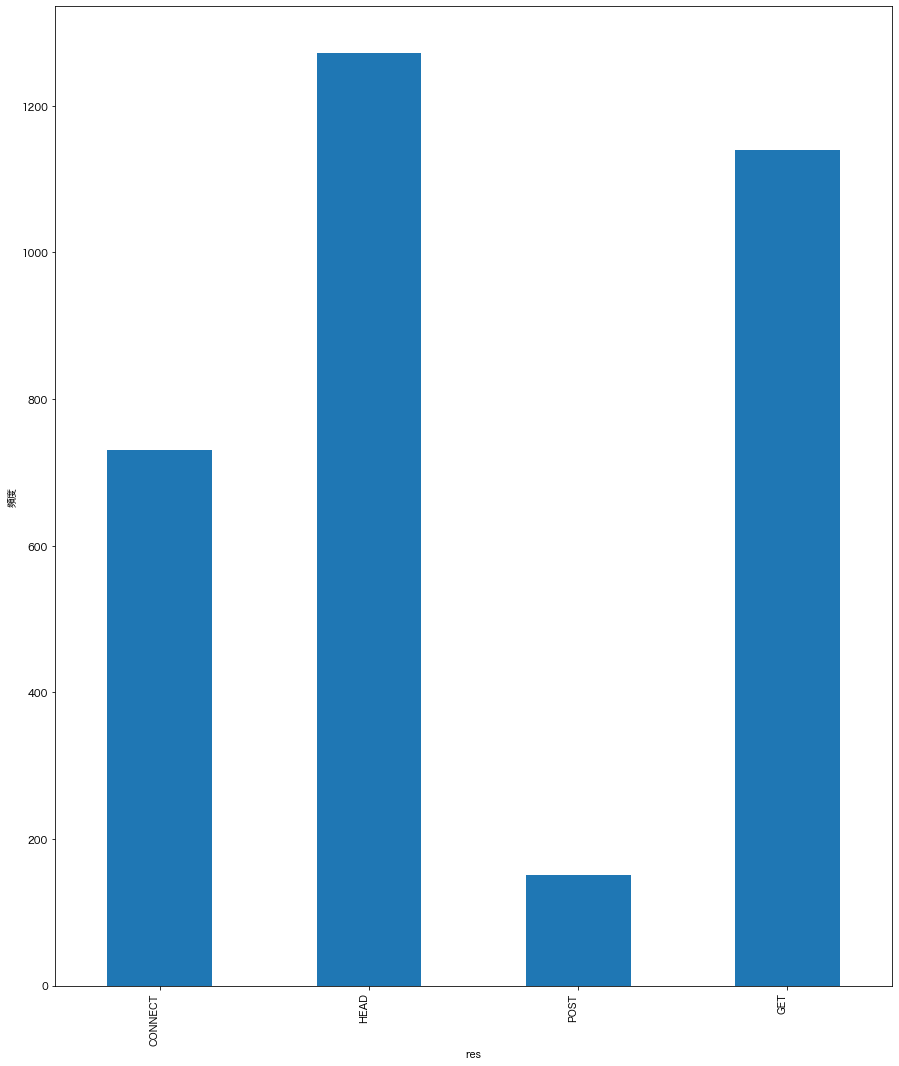

In [15]:
class log_analytic_code:
    def __init__(self,fpass):
        import pandas as pd
        import matplotlib.pyplot as plt
        import warnings
        import base64
        warnings.simplefilter('ignore')
        %matplotlib inline
        self.fpass = pd.read_csv(fpass,delimiter=' ',names=('ymd','time','from_ip_adress','to_ip_address','HTTP','status_code','TorF','basic64'))
    
    def make_access_plot(self):
        print('daily access count')
        self.fpass['ymd'].value_counts().plot(color='orange',figsize=(15,15))
        plt.xlabel('日付')
        plt.ylabel('アクセス数')
        plt.grid()
        plt.savefig('access_count.png')
    
    def make_ip_count(self,rank_c):
        print('up address count start')
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c).plot(kind='bar',figsize=(15,15))
        self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).to_csv('ip.csv')
        print(self.fpass['from_ip_adress'].value_counts().sort_values(ascending=False).head(rank_c))
        plt.ylabel('アクセス数')
        plt.xlabel('ipアドレス')
        plt.savefig('ip_adress_count.png')
        
    def make_response_plot(self):
        print('status code aggrication start')
        
        self.fpass['status_code'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,20))
        print(self.fpass['status_code'].value_counts().sort_values(ascending=False))
        plt.ylabel('頻度')
        plt.xlabel('ステータスコード')
        plt.savefig('status_code.png')
        
    def make_url_plot(self,rank_c):
        print('url_aggrication_start')
        self.fpass['url'].value_counts().sort_values(ascending=True).head(rank_c).plot(kind='bar',figsize=(15,20))
        print(self.fpass['url'].value_counts().sort_values(ascending=True))
        plt.ylabel('頻度')
        plt.xlabel('url')
        plt.savefig('url.png')
    
    def make_httpres_plot(self):
        print('httpres_process')
        self.fpass['res'].value_counts().sort_values(ascending=True).head().plot(kind='bar',figsize=(15,20))
        print(self.fpass['res'].value_counts().sort_values(ascending=True))
        plt.ylabel('頻度')
        plt.xlabel('res')
        plt.savefig('res.png')        
    
    def display(self):
        print(self.fpass)
    
    def mung(self):
        print('process start')
        self.fpass['ymd']=self.fpass['ymd'].str.replace('[','')
        self.fpass['time']=self.fpass['time'].str.replace(']','')
        self.fpass['time']=pd.to_datetime(self.fpass['ymd'] + ' ' + self.fpass['time'],format='%Y-%m-%d %H:%M:%S+0900')
        self.fpass['ymd']=pd.to_datetime(self.fpass['ymd'],format='%Y-%m-%d')
        for i in range(0,len(data['basic64'])):
            self.fpass['basic64'][i] = base64.b64decode(self.fpass['basic64'][i]).decode()
            
        self.fpass['res']=self.fpass['HTTP']
        self.fpass['url']=self.fpass['HTTP']
        for i in range(0,len(data['HTTP'])):
            self.fpass['res'][i] = self.fpass['HTTP'].str.split()[i][0]
            self.fpass['url'][i] = self.fpass['HTTP'].str.split()[i][2]
        print('end of data mungging')
            
        return self.fpass

if __name__ == "__main__":
    log_an = log_analytic_code('/Users/takishun/files20220327/access_log.txt') 
    log_an.mung()
    log_an.make_access_plot()
    log_an.make_ip_count(10)
    log_an.make_url_plot(10)
    log_an.make_response_plot()
    log_an.make_httpres_plot()
    print('log_process_end')
    
    

85.113.44.207      2001
218.93.8.14        1625
20.228.192.2        132
45.146.165.37        44
31.210.20.89         34
109.237.103.123      22
103.156.90.65        21
37.0.15.238          17
109.237.96.124       17
109.237.103.9        16
Name: from_ip_adress, dtype: int64


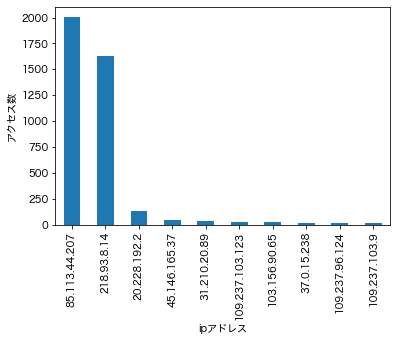

In [182]:
a = log_analytic_code('/Users/takishun/files20220327/access_log.txt') 
a.mung()
a.make_ip_count(10)